## 선형 회귀
- y = ax + b

In [1]:
import pandas as pd

df = pd.read_csv('data/Fish.csv')

In [9]:
perch_df = df.loc[df['Species'] == 'Perch']

perch_length = perch_df[['Length2']]
perch_weight = perch_df[['Weight']]
# perch_length

In [10]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight)

In [12]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(train_input, train_target)

LinearRegression()

In [13]:
lr.score(test_input, test_target)

0.9157474123001345

In [14]:
lr.predict([[100]]) # K-최근접의 문제 해결 - 값이 커지면 똑같은 이웃을 바라보기 때문에 더 큰 값의 길이를 입력해도 같은 무게가 나옴

C:\Users\1-13\Desktop\DAMF2\ml\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[2893.41961355]])

In [15]:
# y = ax + b
lr.coef_ # 기울기(a), 가중치(weight) : 영향을 얼마나 줄까

array([[34.89757194]])

In [16]:
lr.intercept_ # y절편(b) => y = 34.89x + (-596.33)

array([-596.33758014])

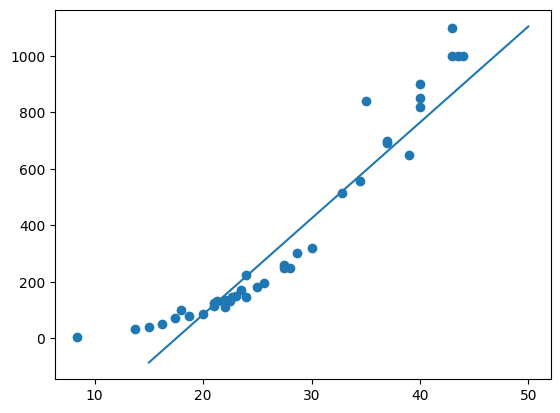

In [20]:
import matplotlib.pyplot as plt

plt.scatter(train_input, train_target)
plt.plot([15,50], [15 * 34 - 596, 50 * 34 - 596]) # plt.plot(시작점, 끝점), 시작점을 y = ax + b에 대입한 점

In [21]:
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

0.9133319504782442
0.9157474123001345


In [28]:
lr.predict([[15]]) # 작은 값의 길이를 입력하면 무게가 음수가 나옴

C:\Users\1-13\Desktop\DAMF2\ml\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[-72.87400109]])

## 다항 회귀
- y = ax^2 + bx + c 
- 선형회귀로 표현할 수 없을 때 사용
- 하나의 특성을 사용

In [48]:
train_input['Length2_poly'] = train_input['Length2'] ** 2
test_input['Length2_poly'] = test_input['Length2'] ** 2
test_input

,Length2,Length2_poly
101,26.5,702.25
102,27.3,745.29
104,27.5,756.25
112,36.5,1332.25
116,39.0,1521.00
82,21.0,441.00
118,39.0,1521.00
98,24.6,605.16
79,19.0,361.00
121,40.0,1600.00


In [36]:
lr = LinearRegression()
lr.fit(train_input, train_target)

LinearRegression()

In [37]:
lr.score(test_input, test_target)

0.9586191677409563

In [50]:
lr.predict([[15, 4]]) # 2차곡선으로 그래프가 바뀌니까 유효한 데이터가 나옴

C:\Users\1-13\Desktop\DAMF2\ml\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[80.21760072]])

In [44]:
print(lr.coef_, lr.intercept_) # => y = 0.95x^2 + (-20.33)x + 117.06

[[-20.33951382   0.95887737]] [117.06111891]
